<a href="https://colab.research.google.com/github/tatianayung/Notebooks/blob/main/Python_Notebook_Working_with_Predictive_Analytics_LinkedIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topics:**

> `Models:`
> * Linear regression
> * Polynomial regression
> * Support vector regression (SVR)
> * Decision tree regression
> * Random forest regression

> `other:`
> * Handling missing values
> * Convert categorical data into numbers (One Hot Encoder | Label Encoder)
> * Divide the data into test and train
> * Feature scaling

> * Evaluation of predictive models
> * Hyperparameter optimization





[Reference 
](https://www.linkedin.com/learning/python-working-with-predictive-analytics/divide-the-data-into-test-and-train)

**Imports**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

#import data
data = pd.read_csv("/content/insurance.csv")

#see the first 15 lines of data
print(data.head(15))

    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male     NaN  

# **3. Handling missing values**

OPTIONS:


1.   Drop column 
2.   Drop Rows
3.   Fill 


```
#OPTION1 for dropping the entire column
data.drop('bmi', axis = 1, inplace = True)

#OPTION2 for dropping NAN
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

#OPTION3 for filling NaN # reloading fresh dataset for option 2
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(data['bmi'].values.reshape(-1, 1))
data['bmi'] = imputer.transform(data['bmi'].values.reshape(-1, 1))

#OPTION4 for filling NaN # reloading fresh dataset for option 3
data['bmi'].fillna(data['bmi'].mean(), inplace = True)
```






In [2]:
 data.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
#using OPTION 3 - filling data
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [4]:
 data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **4. Convert categorical data into numbers**

using either:


1.   Label encoding
2.   One hot encoding



# > `LabelEncoder`

> **OPTION 1** - factorize() from Pandas 

> **OPTION 2** - LabelEncoder   from Sklearn

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [6]:
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

In [7]:
"""OPTION 2 - using LabelEncoder() example"""

## le for sex
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")
print(le_sex_mapping)
print(sex[:10])

## le for smoker
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")
print(le_smoker_mapping)
print(smoker[:10])

Sklearn label encoder results for sex:
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0
Sklearn label encoder results for smoker:
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0




# > `OneHotEncode`

> **OPTION 1** - pd.get_dummies() from Pandas

> **OPTION 2** - OneHotEncoder   from Sklearn





In [8]:
"""OPTION1 - using pd.get_dummies from Pandas"""
region_encoded = pd.get_dummies(data['region'], prefix='')
region_encoded.columns = ['NorthEast', 'NorthWest', 'SouthEast', 'SouthWest']
region_encoded

,NorthEast,NorthWest,SouthEast,SouthWest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [9]:
"""OPTION 2 - using OneHotEncoder from sklearn"""
from sklearn.preprocessing import OneHotEncoder
region = data.iloc[:,5:6].values #ndarray
ohe = OneHotEncoder() 
region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])

Sklearn one hot encoder results for region:
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


# **5. Divide data into TEST & TRAIN**

dive data as:
*   1/3 in testing
*   2/3 in training



In [10]:
##take the numerical data from the original data
X_num = data[['age', 'bmi', 'children']].copy()

##take the encoded data and add to numerical data
X_final = pd.concat([X_num, region, sex, smoker], axis = 1)

#define y as being the "charges column" from the original dataset
y_final = data[['charges']].copy()

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

# **6. Feature Scaling (Optional)**
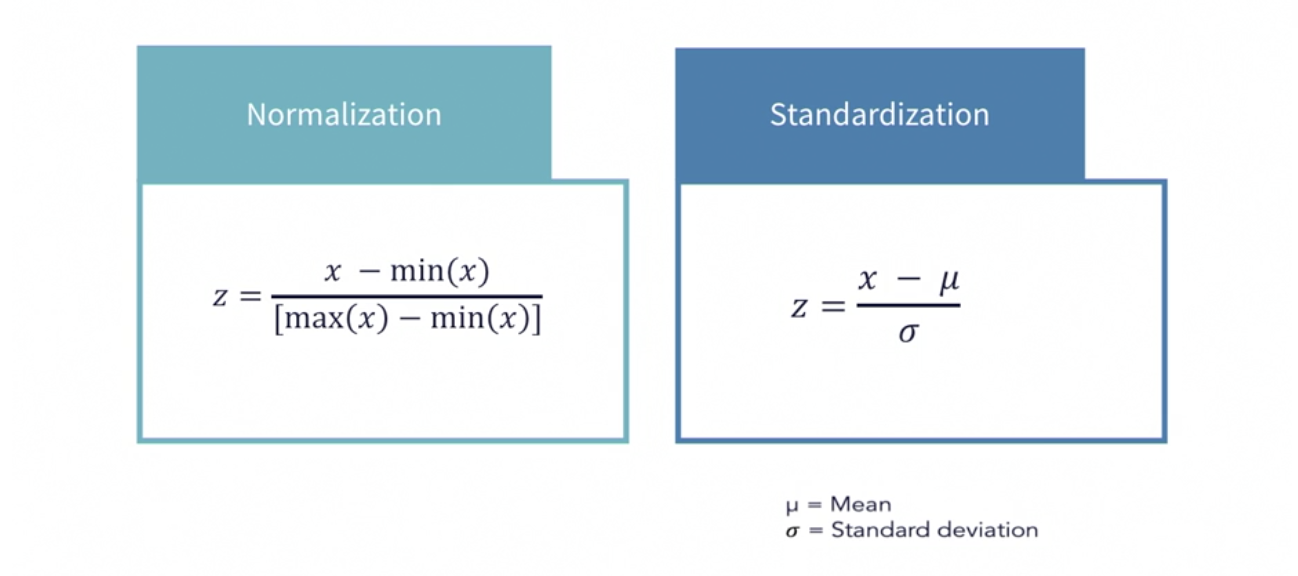

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

###normalized scaler (fit transform on train, fit only on test)
#n_scaler = MinMaxScaler()
#X_train = n_scaler.fit_transform(X_train.astype(np.float))
#X_test= n_scaler.transform(X_test.astype(np.float))


#standard scaler (fit transform on train, fit only on test)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))

# **2.2 Linear Regression**

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

lr.coef_: [[3624.36356197 1966.90473927  661.35603447  242.57758422  -29.49212715
  -104.19142495  -99.14488063  -44.54996175 9310.54961689]]
lr.intercept_: [13141.35083164]
lr train score 0.728, lr test score: 0.786


# **2.3 Polynomial Regression**



In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures (degree = 3)
X_poly = poly.fit_transform(X_final)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y_final, test_size = 0.33, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

#print score
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.840, poly test score: 0.853


# **2.4 Support Vector Regression (SVR)**

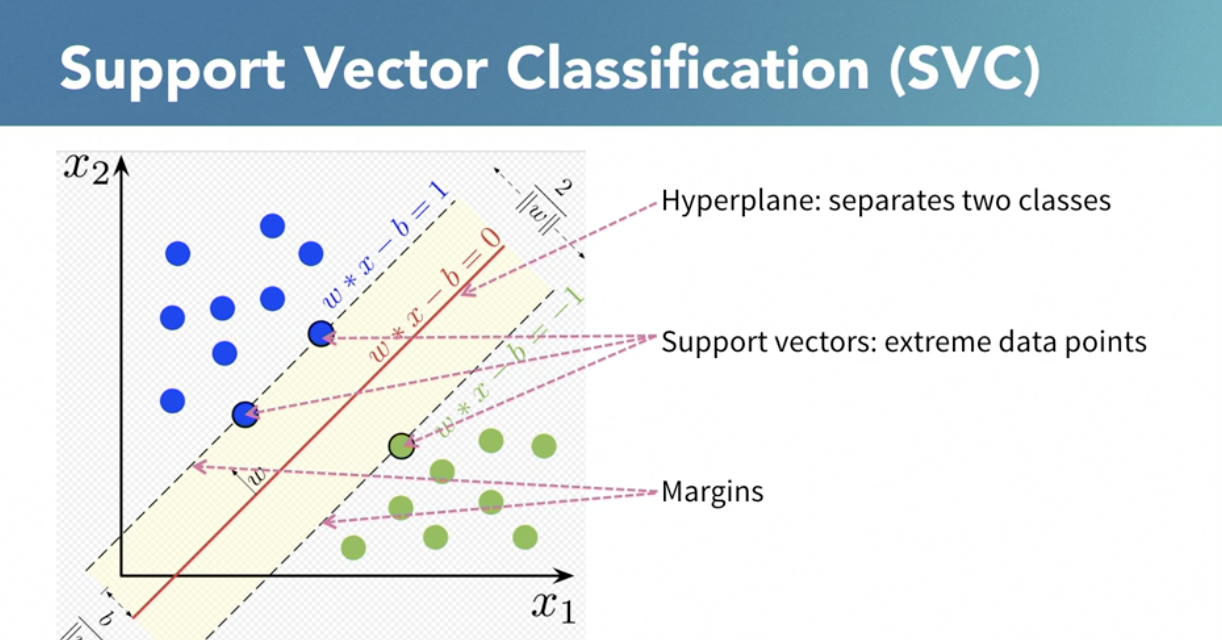

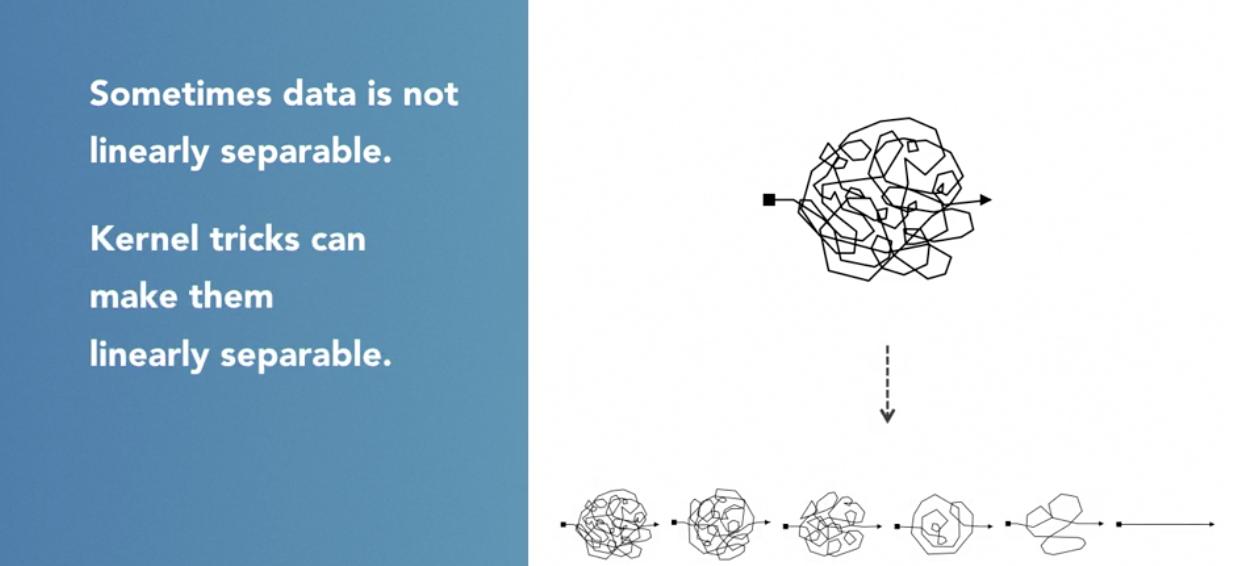

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score 0.598, svr test score: 0.628


# **2.5 Decision Trees**

In [15]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))


#fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

dt train score 0.999, dt test score: 0.701


# **2.6 Random Forest Regression**

Consist of multiple Decision Trees

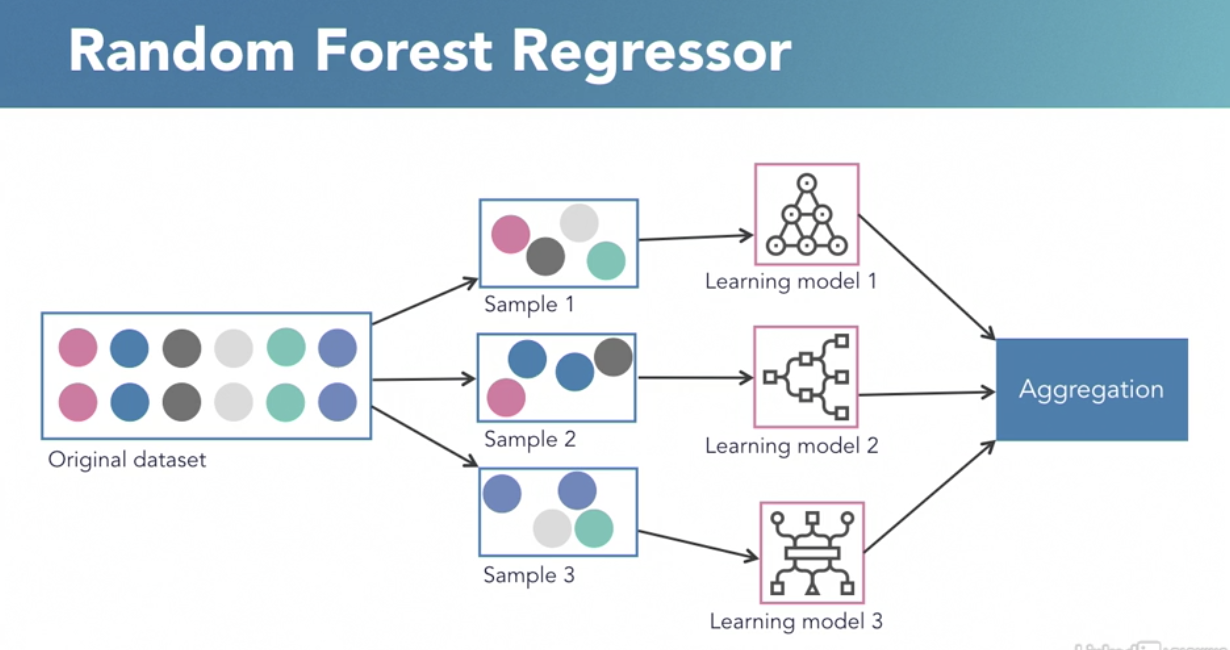

In [16]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse', # mean square error
                              random_state = 1,
                              n_jobs = -1)
#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.973, forest test score: 0.859


# **Hyperparameter Optimization**

shows which parameter gets the best results! I does it for you!

In [17]:
#Function to print best hyperparamaters: 
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

In [ ]:
from sklearn.model_selection import GridSearchCV

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

###Challenge 1: SVR parameter grid###
param_grid_svr = dict(kernel=[ 'linear', 'poly'],
                     degree=[2],
                     C=[600, 700, 800, 900],
                     epsilon=[0.0001, 0.00001, 0.000001])
svr = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, verbose=3)

#fit model
svr = svr.fit(X_train,y_train.values.ravel())

#print score
print('\n\nsvr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))
#print(svr.best_estimator_.get_params())

print_best_params(svr)

In [20]:
param_grid_dt = dict(min_samples_leaf=np.arange(9, 13, 1, int), 
                  max_depth = np.arange(4,7,1, int),
                  min_impurity_decrease = [0, 1, 2],
                 )

dt = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid_dt, cv=5,  verbose=3)



#fit model
dt = dt.fit(X_train,y_train.values.ravel())


#print score
print('\n\ndt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))
print_best_params(dt)



###Challenge 3:Random Forest parameter grid###
param_grid_rf = dict(n_estimators=[20],
                     max_depth=np.arange(1, 13, 2),
                     min_samples_split=[2],
                     min_samples_leaf= np.arange(1, 15, 2, int),
                     bootstrap=[True, False],
                     oob_score=[False, ])


forest = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid_rf, cv=5, verbose=3)

#fit model
forest.fit(X_train,y_train.values.ravel())


#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

print_best_params(forest)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.817, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.819, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.846, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.812, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.796, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=10, score=0.852, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=10, score=0.816, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=10, score=0.787, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=11, score=0.826, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=11, score=0.819, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=5, min_impurity_decrease=0, min_samples_leaf=11, score=0.851, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=5, min

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.646, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.595, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.582, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.616, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:   16.4s finished


In [ ]:
data.head()